# Plotting the station on a map

## Python version

In [2]:
import sys

In [3]:
print(sys.version)

3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]


## Import packages and data

In [4]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [5]:
url = 'https://gbfs.baywheels.com/gbfs/en/station_information.json'
req = requests.get(url)


In [6]:
df_sf = pd.DataFrame(req.json()['data']['stations']).drop(columns=['rental_uris'])

In [7]:
df_sf.columns

Index(['legacy_id', 'capacity', 'name', 'lat', 'region_id', 'station_type',
       'eightd_has_key_dispenser', 'station_id', 'has_kiosk', 'rental_methods',
       'eightd_station_services', 'external_id', 'lon',
       'electric_bike_surcharge_waiver', 'short_name'],
      dtype='object')

In [8]:
df_sf['region_id'].unique()

array(['5', '12', '3', '14', '0', '13', nan], dtype=object)

In [9]:
df_ext = df_sf.loc[df_sf['region_id'] == '0']

In [10]:
df_sf.loc[df_sf['name'].str.contains('Caltrain Station')]

,legacy_id,capacity,name,lat,region_id,station_type,eightd_has_key_dispenser,station_id,has_kiosk,rental_methods,eightd_station_services,external_id,lon,electric_bike_surcharge_waiver,short_name
164,465,18,San Francisco Caltrain Station (King St at 4th...,37.776311,3,classic,False,a7da1857-747a-4507-9d8f-2a9f95f0babf,True,"[KEY, CREDITCARD]",[],a7da1857-747a-4507-9d8f-2a9f95f0babf,-122.394495,False,SF-J29-3
197,130,35,22nd St Caltrain Station,37.757704,3,classic,False,e7691d93-eed6-4388-b681-00ae0b455d23,True,"[KEY, CREDITCARD]",[],e7691d93-eed6-4388-b681-00ae0b455d23,-122.391885,False,SF-P30


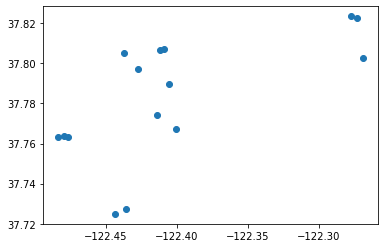

In [11]:
plt.scatter(df_ext.lon, df_ext.lat)

In [12]:
#!pip install zipf
import zipfile

In [13]:
with zipfile.ZipFile('tl_2021_06075_roads.zip', 'r') as zip_ref:
    zip_ref.extractall('shapefiles')

In [14]:
import geopandas as gpd 

In [15]:
# Import shapefile as GeoDataFrame
geo_df = gpd.read_file('shapefiles/tl_2021_06075_roads.shp')

In [16]:
geo_df

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110498938773,Hwy 101 S Off Rmp,M,S1400,"LINESTRING (-122.40410 37.74842, -122.40397 37..."
1,110498937425,Hwy 101 N on Rmp,M,S1400,"LINESTRING (-122.47441 37.80691, -122.47461 37..."
2,1108475858996,US Hwy 101 Bus,U,S1200,"LINESTRING (-122.42461 37.80130, -122.42460 37..."
3,1103660229533,Ludlow Aly - No Acc,M,S1780,"LINESTRING (-122.45959 37.73853, -122.45956 37..."
4,1104995434770,Old Mason St,M,S1400,"LINESTRING (-122.45456 37.80419, -122.45492 37..."
...,...,...,...,...,...
4078,110498939543,Friendship Ct,M,S1400,"LINESTRING (-122.43073 37.77781, -122.43084 37..."
4079,110498940789,None,None,S1400,"LINESTRING (-122.45077 37.77880, -122.45070 37..."
4080,110498932589,Flint St,M,S1400,"LINESTRING (-122.43654 37.76398, -122.43673 37..."
4081,110498939711,Twin Peaks Blvd,M,S1400,"LINESTRING (-122.44721 37.75404, -122.44687 37..."


In [17]:
df_sf.region_id.unique()

array(['5', '12', '3', '14', '0', '13', nan], dtype=object)

In [18]:
geo_df.loc[geo_df['FULLNAME'] == 'Octavia St']

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
1005,11016957645924,Octavia St,M,S1400,"LINESTRING (-122.42366 37.77178, -122.42369 37..."
2384,110498936857,Octavia St,M,S1400,"LINESTRING (-122.42780 37.79243, -122.42798 37..."
2902,110498936855,Octavia St,M,S1400,"LINESTRING (-122.42667 37.78692, -122.42687 37..."
4052,11016957645925,Octavia St,M,S1400,"LINESTRING (-122.42370 37.77210, -122.42387 37..."
4082,11016957626758,Octavia St,M,S1400,"LINESTRING (-122.42370 37.77210, -122.42366 37..."


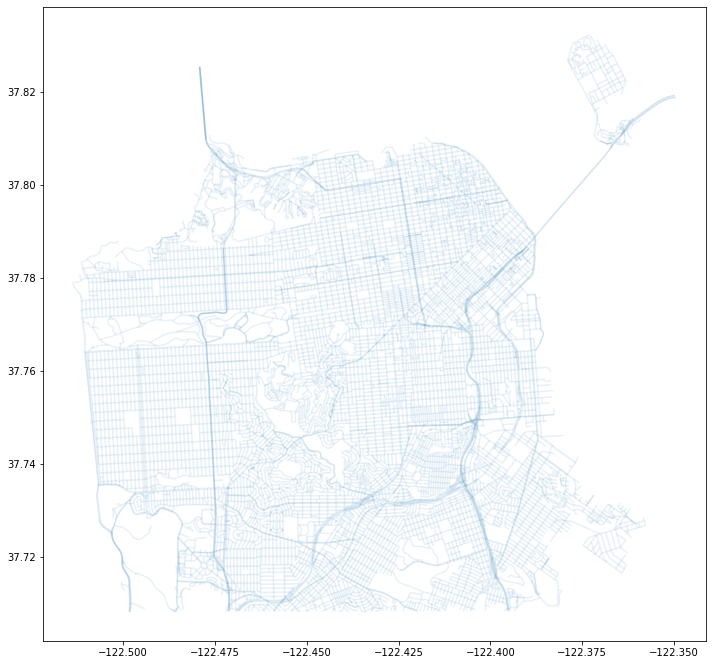

In [19]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(10,10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
#ctx.add_basemap(ax)

# Turn off axis
#ax.set_axis_off()
# Save image
fig.tight_layout()

In [21]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

In [22]:
df_sf.loc[df_sf['lon'] < -122.35]

,legacy_id,capacity,name,lat,region_id,station_type,eightd_has_key_dispenser,station_id,has_kiosk,rental_methods,eightd_station_services,external_id,lon,electric_bike_surcharge_waiver,short_name
83,60,31,8th St at Ringold St,37.774520,3,classic,False,1822622c-b9e0-43fe-8bf9-9f26024aa426,True,"[KEY, CREDITCARD]",[],1822622c-b9e0-43fe-8bf9-9f26024aa426,-122.409449,False,SF-J24
86,21,27,Montgomery St BART Station (Market St at 2nd St),37.789620,3,classic,False,2b935f1b-2659-4d82-a348-6a3bb083914d,True,"[KEY, CREDITCARD]",[],2b935f1b-2659-4d82-a348-6a3bb083914d,-122.400808,False,SF-F28-2
87,129,19,Harrison St at 20th St,37.758862,3,classic,False,cae028f4-b136-4297-8f28-559986e3f810,True,"[KEY, CREDITCARD]",[],cae028f4-b136-4297-8f28-559986e3f810,-122.412544,False,SF-P24
88,399,27,Bay St at Fillmore St,37.802664,3,classic,False,43974bf5-147b-4348-aed6-eb29626cb1cf,True,"[KEY, CREDITCARD]",[],43974bf5-147b-4348-aed6-eb29626cb1cf,-122.436064,False,SF-B19
89,368,27,Myrtle St at Polk St,37.785479,3,classic,False,3612155a-0fb2-4e66-8bab-f81979bfe54a,True,"[KEY, CREDITCARD]",[],3612155a-0fb2-4e66-8bab-f81979bfe54a,-122.419342,False,SF-G23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,53,27,Grove St at Divisadero,37.775946,3,classic,False,d533df76-e03c-4ef3-b928-968aaed45823,True,"[KEY, CREDITCARD]",[],d533df76-e03c-4ef3-b928-968aaed45823,-122.437777,False,SF-J18
491,460,15,Terry Francois Blvd at Warriors Way,37.769095,3,classic,False,460,True,"[CREDITCARD, KEY]",[],87168190-5491-47c8-bb9b-187ddf6052c3,-122.386333,False,SF-M30-2
492,577,22,Divisadero St at Lombard St,37.799175,NaN,classic,False,577,True,"[CREDITCARD, KEY]",[],82ad4cff-001f-49a8-88fa-a5a63d64b9a2,-122.442729,False,SF-C18
493,578,19,Detroit St at Hearst Ave,37.730655,NaN,classic,False,578,True,"[CREDITCARD, KEY]",[],41b2200f-7915-410b-95c6-084bc4d3dee8,-122.444305,False,SF-X16


In [23]:
# Add a geometry column that holds Point objects
df_sf['geometry'] = df_sf.apply(lambda x: Point(float(x.lon), float(x.lat)), axis=1)
# Convert Pandas DataFrame to a GeoDataFrame
stations_gpdf = gpd.GeoDataFrame(df_sf.loc[df_sf['lon'] < -122.35], geometry='geometry')
# Initialize crs to 4326 because that's the format of our geomtry
#starbucks_geo_df.crs = "EPSG:4326"
# Change the crs to match our SF GeoDataFrame
#starbucks_geo_df = starbucks_geo_df.to_crs(epsg = 3857)


/home/ec2-user/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [26]:
stations_gpdf

,legacy_id,capacity,name,lat,region_id,station_type,eightd_has_key_dispenser,station_id,has_kiosk,rental_methods,eightd_station_services,external_id,lon,electric_bike_surcharge_waiver,short_name,geometry
83,60,31,8th St at Ringold St,37.774520,3,classic,False,1822622c-b9e0-43fe-8bf9-9f26024aa426,True,"[KEY, CREDITCARD]",[],1822622c-b9e0-43fe-8bf9-9f26024aa426,-122.409449,False,SF-J24,POINT (-122.40945 37.77452)
86,21,27,Montgomery St BART Station (Market St at 2nd St),37.789620,3,classic,False,2b935f1b-2659-4d82-a348-6a3bb083914d,True,"[KEY, CREDITCARD]",[],2b935f1b-2659-4d82-a348-6a3bb083914d,-122.400808,False,SF-F28-2,POINT (-122.40081 37.78962)
87,129,19,Harrison St at 20th St,37.758862,3,classic,False,cae028f4-b136-4297-8f28-559986e3f810,True,"[KEY, CREDITCARD]",[],cae028f4-b136-4297-8f28-559986e3f810,-122.412544,False,SF-P24,POINT (-122.41254 37.75886)
88,399,27,Bay St at Fillmore St,37.802664,3,classic,False,43974bf5-147b-4348-aed6-eb29626cb1cf,True,"[KEY, CREDITCARD]",[],43974bf5-147b-4348-aed6-eb29626cb1cf,-122.436064,False,SF-B19,POINT (-122.43606 37.80266)
89,368,27,Myrtle St at Polk St,37.785479,3,classic,False,3612155a-0fb2-4e66-8bab-f81979bfe54a,True,"[KEY, CREDITCARD]",[],3612155a-0fb2-4e66-8bab-f81979bfe54a,-122.419342,False,SF-G23,POINT (-122.41934 37.78548)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,53,27,Grove St at Divisadero,37.775946,3,classic,False,d533df76-e03c-4ef3-b928-968aaed45823,True,"[KEY, CREDITCARD]",[],d533df76-e03c-4ef3-b928-968aaed45823,-122.437777,False,SF-J18,POINT (-122.43778 37.77595)
491,460,15,Terry Francois Blvd at Warriors Way,37.769095,3,classic,False,460,True,"[CREDITCARD, KEY]",[],87168190-5491-47c8-bb9b-187ddf6052c3,-122.386333,False,SF-M30-2,POINT (-122.38633 37.76909)
492,577,22,Divisadero St at Lombard St,37.799175,NaN,classic,False,577,True,"[CREDITCARD, KEY]",[],82ad4cff-001f-49a8-88fa-a5a63d64b9a2,-122.442729,False,SF-C18,POINT (-122.44273 37.79918)
493,578,19,Detroit St at Hearst Ave,37.730655,NaN,classic,False,578,True,"[CREDITCARD, KEY]",[],41b2200f-7915-410b-95c6-084bc4d3dee8,-122.444305,False,SF-X16,POINT (-122.44430 37.73066)


Text(0.5, 1.0, 'Baywheels Stations in San Francisco')

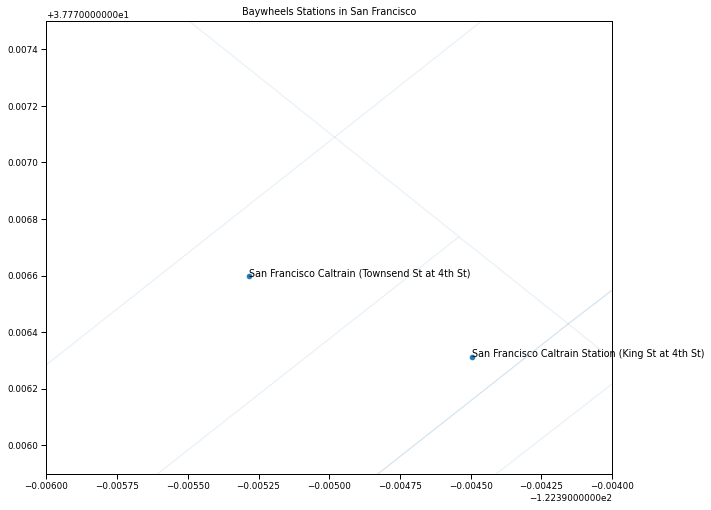

In [37]:
# Change context for readability
sns.set_context("paper")
# Initialize our plot
fig, ax = plt.subplots(figsize=(10, 10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
# Plot our Starbucks locations
stations_gpdf.plot(ax=ax)

min_lat, max_lat = (37.7759, 37.7775)
min_lon, max_lon = (-122.396, -122.394)

for point in stations_gpdf.loc[(stations_gpdf['lon'].between(min_lon, max_lon))
                               & (stations_gpdf['lat'].between(min_lat, max_lat))].index:
    ax.text(stations_gpdf.loc[point]['lon'], stations_gpdf.loc[point]['lat'], stations_gpdf.loc[point]['name'])
# Add in a background using contextily
#ctx.add_basemap(ax)
# Turn off axis
ax.set_xlim((min_lon, max_lon))
ax.set_ylim((min_lat, max_lat))
#ax.set_axis_off()
fig.tight_layout()
plt.title("Baywheels Stations in San Francisco")

In [61]:
stations_gpdf

,capacity,rental_methods,electric_bike_surcharge_waiver,has_kiosk,station_type,external_id,station_id,lat,eightd_has_key_dispenser,legacy_id,short_name,lon,region_id,name,eightd_station_services,geometry
82,19,"[KEY, CREDITCARD]",False,True,classic,c4c4484d-0e18-44d4-a992-c5d0550ba94d,c4c4484d-0e18-44d4-a992-c5d0550ba94d,37.729279,False,358,SF-Y29,-122.392896,3,Williams Ave at 3rd St,[],POINT (-122.39290 37.72928)
84,19,"[KEY, CREDITCARD]",False,True,classic,1a7a0757-fbbb-497e-b92b-cb0817cab274,1a7a0757-fbbb-497e-b92b-cb0817cab274,37.741978,False,509,SF-U30,-122.386892,3,Evans Ave at Newhall St,[],POINT (-122.38689 37.74198)
87,19,"[KEY, CREDITCARD]",False,True,classic,63b2136c-c947-473e-977e-8cc0e6347699,63b2136c-c947-473e-977e-8cc0e6347699,37.790803,False,492,SF-E20,-122.432590,3,Webster St at Clay St,[],POINT (-122.43259 37.79080)
88,15,"[KEY, CREDITCARD]",False,True,classic,0fc2ae3f-b5ac-493b-bd93-8300b601f9db,0fc2ae3f-b5ac-493b-bd93-8300b601f9db,37.743684,False,145,SF-T20,-122.426806,3,29th St at Church St,[],POINT (-122.42681 37.74368)
89,35,"[KEY, CREDITCARD]",False,True,classic,482f48f4-7ed6-4e69-a778-a2aba0f39c80,482f48f4-7ed6-4e69-a778-a2aba0f39c80,37.767045,False,104,SF-M30,-122.390833,3,4th St at 16th St,[],POINT (-122.39083 37.76704)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,23,"[KEY, CREDITCARD]",False,True,classic,f518d262-a592-4b3d-b026-b9215bea13d0,f518d262-a592-4b3d-b026-b9215bea13d0,37.802300,False,441,SF-B22,-122.424413,3,Chestnut St at Van Ness Ave,[],POINT (-122.42441 37.80230)
491,15,"[CREDITCARD, KEY]",False,True,classic,87168190-5491-47c8-bb9b-187ddf6052c3,460,37.769095,False,460,SF-M30-2,-122.386333,3,Terry Francois Blvd at Warriors Way,[],POINT (-122.38633 37.76909)
492,22,"[CREDITCARD, KEY]",False,True,classic,82ad4cff-001f-49a8-88fa-a5a63d64b9a2,577,37.799175,False,577,SF-C18,-122.442729,NaN,Divisadero St at Lombard St,[],POINT (-122.44273 37.79918)
493,19,"[CREDITCARD, KEY]",False,True,classic,41b2200f-7915-410b-95c6-084bc4d3dee8,578,37.730655,False,578,SF-X16,-122.444305,NaN,Detroit St at Hearst Ave,[],POINT (-122.44430 37.73066)
